In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir ('C:\\Users\\mkorzec\Downloads')

from datetime import datetime

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
data = df[['Age', 'Overall', 'Potential', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']]

In [6]:
data.head()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,31,94,94,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,33,94,94,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,26,92,93,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,27,91,93,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,27,91,92,2281,Right,4.0,5.0,4.0,High/ High,Normal,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [7]:
data.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 42 columns):
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Height                      18159 non-null object
Weight                      18159 non-null object
Crossing                    18159 non-null float64
Finishing                   18159 non-null float64
HeadingAccuracy             18159 non-null float64
ShortPassing                18159 non-null float64
Volleys                     18159 non-

In [9]:
data.dropna(inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 42 columns):
Age                         18147 non-null int64
Overall                     18147 non-null int64
Potential                   18147 non-null int64
Special                     18147 non-null int64
Preferred Foot              18147 non-null object
International Reputation    18147 non-null float64
Weak Foot                   18147 non-null float64
Skill Moves                 18147 non-null float64
Work Rate                   18147 non-null object
Body Type                   18147 non-null object
Position                    18147 non-null object
Height                      18147 non-null object
Weight                      18147 non-null object
Crossing                    18147 non-null float64
Finishing                   18147 non-null float64
HeadingAccuracy             18147 non-null float64
ShortPassing                18147 non-null float64
Volleys                     18147 non-

In [11]:
data['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [12]:
data['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [13]:
data['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"], dtype=object)

In [14]:
x = data['Height']

In [15]:
x.unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"], dtype=object)

In [16]:
new = x.str.split("'", n = 1, expand = True)

In [17]:
data['Feet'] = pd.to_numeric(new[0])

In [18]:
data['Inches'] = pd.to_numeric(new[1])

In [19]:
data['Height_converted'] = ((data['Feet'] * 12) + data['Inches'])

In [20]:
data['Height_converted'].head()

0    67
1    74
2    69
3    76
4    71
Name: Height_converted, dtype: int64

In [21]:
data['Weight'] = data['Weight'].str.rstrip('lbs')

In [22]:
data['Weight'] = pd.to_numeric(data['Weight'])

In [23]:
data['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [24]:
data['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [25]:
data['Body Type'][data['Body Type'] == 'Messi'] = 'Lean'
data['Body Type'][data['Body Type'] == 'C. Ronaldo'] = 'Lean'
data['Body Type'][data['Body Type'] == 'Neymar'] = 'Lean'
data['Body Type'][data['Body Type'] == 'Courtois'] = 'Lean'
data['Body Type'][data['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Shaqiri'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Akinfenwa'] = 'Stocky'

In [26]:
data['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [27]:
data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [28]:
le = LabelEncoder()

In [29]:
data.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'Feet', 'Inches',
       'Height_converted'],
      dtype='object')

In [30]:
df = data[['Age', 'Overall', 'Potential', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'Height_converted']]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 43 columns):
Age                         18147 non-null int64
Overall                     18147 non-null int64
Potential                   18147 non-null int64
Special                     18147 non-null int64
Preferred Foot              18147 non-null object
International Reputation    18147 non-null float64
Weak Foot                   18147 non-null float64
Skill Moves                 18147 non-null float64
Work Rate                   18147 non-null object
Body Type                   18147 non-null object
Position                    18147 non-null object
Height                      18147 non-null object
Weight                      18147 non-null int64
Crossing                    18147 non-null float64
Finishing                   18147 non-null float64
HeadingAccuracy             18147 non-null float64
ShortPassing                18147 non-null float64
Volleys                     18147 non-n

In [32]:
df['Preferred Foot'] = le.fit_transform(df['Preferred Foot'])

In [33]:
bins = (46, 74.5, 94)
group_names = ['bad', 'good']
df['Overall'] = pd.cut(df['Overall'], bins = bins, labels = group_names)
df['Overall'].unique()

[good, bad, NaN]
Categories (2, object): [bad < good]

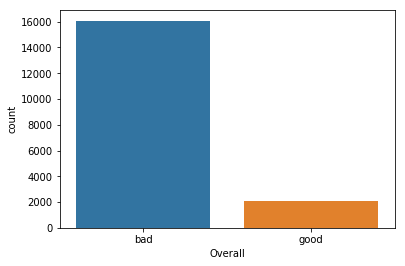

In [34]:
sns.countplot(df['Overall'])

In [35]:
df.drop(['Height', 'Work Rate', 'Body Type', 'Position'], axis = 1, inplace = True)

In [36]:
df.dropna(inplace = True)

In [37]:
X = df.drop('Overall', axis = 1)
y = df['Overall']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Random Forest Classifier

In [40]:
rfc = RandomForestClassifier(n_estimators=200)

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
pred_rfc = rfc.predict(X_test)

In [43]:
pred_rfc[:35]

array(['bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad'],
      dtype=object)

In [44]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         bad       0.99      0.99      0.99      4803
        good       0.96      0.91      0.93       641

   micro avg       0.98      0.98      0.98      5444
   macro avg       0.97      0.95      0.96      5444
weighted avg       0.98      0.98      0.98      5444



In [45]:
confusion_matrix(y_test, pred_rfc)

array([[4778,   25],
       [  58,  583]], dtype=int64)

### SVM Classifier

In [46]:
clf = svm.SVC()

In [47]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
pred_clf = clf.predict(X_test)

In [49]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

         bad       0.98      0.99      0.99      4803
        good       0.95      0.85      0.89       641

   micro avg       0.98      0.98      0.98      5444
   macro avg       0.96      0.92      0.94      5444
weighted avg       0.98      0.98      0.98      5444



In [50]:
confusion_matrix(y_test, pred_clf)

array([[4772,   31],
       [  99,  542]], dtype=int64)

### Neural Network

In [53]:
mlpc = MLPClassifier(hidden_layer_sizes = (20, 20, 20), max_iter = 500)
mlpc.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [54]:
pred_mlpc = mlpc.predict(X_test)

In [55]:
print(classification_report(y_test, pred_mlpc))

              precision    recall  f1-score   support

         bad       0.99      0.99      0.99      4803
        good       0.93      0.90      0.91       641

   micro avg       0.98      0.98      0.98      5444
   macro avg       0.96      0.94      0.95      5444
weighted avg       0.98      0.98      0.98      5444

